# Requirements

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import *
from xgboost import XGBRegressor

## Obesity Analysis


# Dataset Description

## Attributes

- id: represents a unique identifier for each participant or record in the dataset.
- Gender: Represents the gender of the individual.
- Age: Indicates the age of the individual.
- Height - Represents the height of the individual.
- Weight: Represents the weight of the individual.
- FCVC Frequency of Consumption of Vegetables
- NCP - Number of Main Meals per Day
- SMOKE - Indicates whether the individual smokes
- CH2O - Consumption of Water
- TUE - Time Using Electronic Devices
- MTRANS - Mode of Transportation
- NObeyesdad - Nutritional Obesity Status, obesity class

### Target variable
- FAF Frequency of Physical Activity

# Read the dataset

In [2]:
df = pd.read_csv('data/obesity.csv')

In [3]:
df.shape

(20758, 14)

In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Age', 'Height', 'Weight', 'FCVC', 'NCP',
       'SMOKE', 'CH2O', 'FAF', 'TUE', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
df.sample(5)

Unnamed: 0       id  Gender        Age    Height     Weight  FCVC  NCP  \
497           497      NaN     NaN  19.000000       NaN  63.000000   NaN  3.0   
4283         4283      NaN    Male  19.671876  1.837399  87.857850   NaN  3.0   
8211         8211   8211.0  Female  18.000000  1.600000  73.000000   3.0  3.0   
18451       18451  18451.0  Female  18.000000       NaN  40.000000   2.0  1.0   
2186         2186   2186.0  Female  22.815416  1.607182  82.694689   NaN  3.0   

      SMOKE      CH2O       FAF       TUE                 MTRANS  \
497      no  1.000000  2.000000  1.000000                    NaN   
4283     no  2.000000  0.288032  0.453649  Public_Transportation   
8211    NaN  2.000000  1.000000  0.000000                Walking   
18451    no  1.000000  0.000000  1.000000  Public_Transportation   
2186     no  2.078297       NaN       NaN  Public_Transportation   

                NObeyesdad  
497     Overweight_Level_I  
4283    Overweight_Level_I  
8211    Overweight_Level_I  
18451  Insufficient_Weight  
2186                   NaN

In [6]:
df.dropna(subset='FAF', inplace=True)

In [7]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [8]:
warnings.filterwarnings('ignore', category=FutureWarning, message='Downcasting behavior in `replace` is deprecated')
df = df.replace({"yes": 1, "no": 0})
df = df.replace({"Male": 0, "Female": 1})

In [9]:
df.NObeyesdad.unique()

array([nan, 'Insufficient_Weight', 'Overweight_Level_II',
       'Obesity_Type_II', 'Overweight_Level_I', 'Normal_Weight',
       'Obesity_Type_I', 'Obesity_Type_III'], dtype=object)

In [10]:
encoder = OrdinalEncoder()
values = encoder.fit_transform(df[['NObeyesdad']])
df[['NObeyesdad']] = values

In [11]:
df.MTRANS.unique()

array(['Public_Transportation', 'Automobile', nan, 'Walking', 'Motorbike',
       'Bike'], dtype=object)

In [12]:
encoder = OrdinalEncoder()
values = encoder.fit_transform(df[['MTRANS']])
df[['MTRANS']] = values

In [13]:
df.sample(3)

Gender   Age    Height     Weight      FCVC  NCP  SMOKE     CH2O  \
8156      1.0  21.0       NaN  65.031879  2.037042  3.0    0.0      NaN   
20175     0.0  18.0  1.710948  50.000000  2.000000  3.0    0.0  1.11756   
12459     NaN  21.0  1.670000  66.000000  2.000000  3.0    0.0  2.00000   

            FAF      TUE  MTRANS  NObeyesdad  
8156   0.562118      NaN     3.0         5.0  
20175  0.917014  1.89388     NaN         0.0  
12459  1.000000  2.00000     3.0         1.0

Explore the dataset using visualizations of your choice.

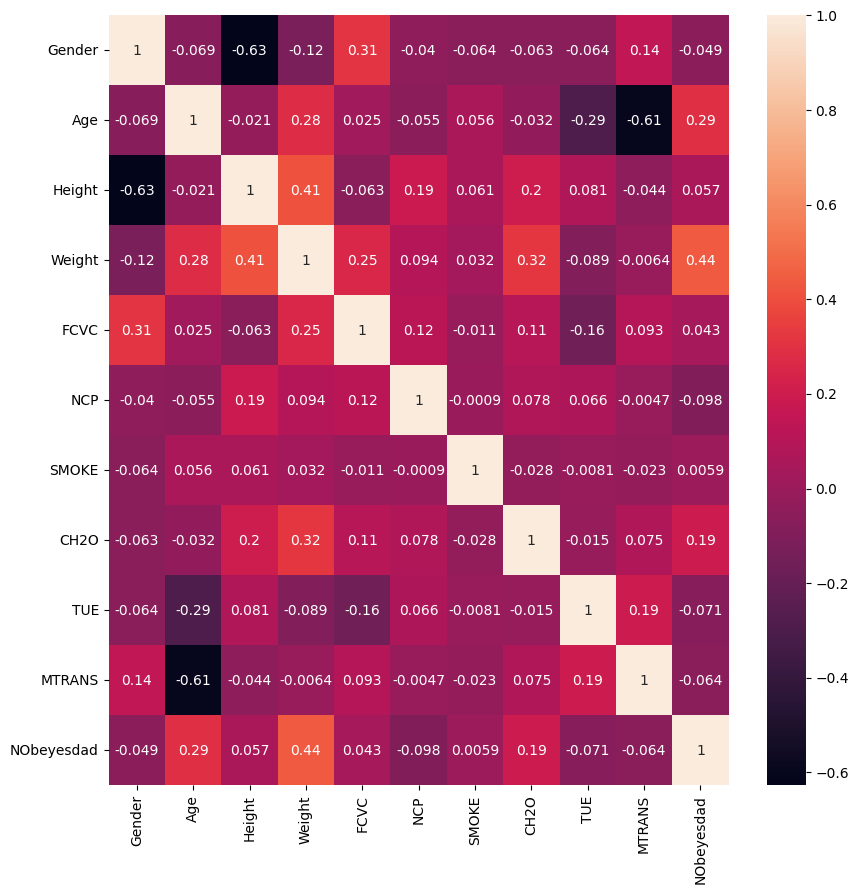

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.drop(columns=['FAF']).corr(), annot=True)
plt.show()

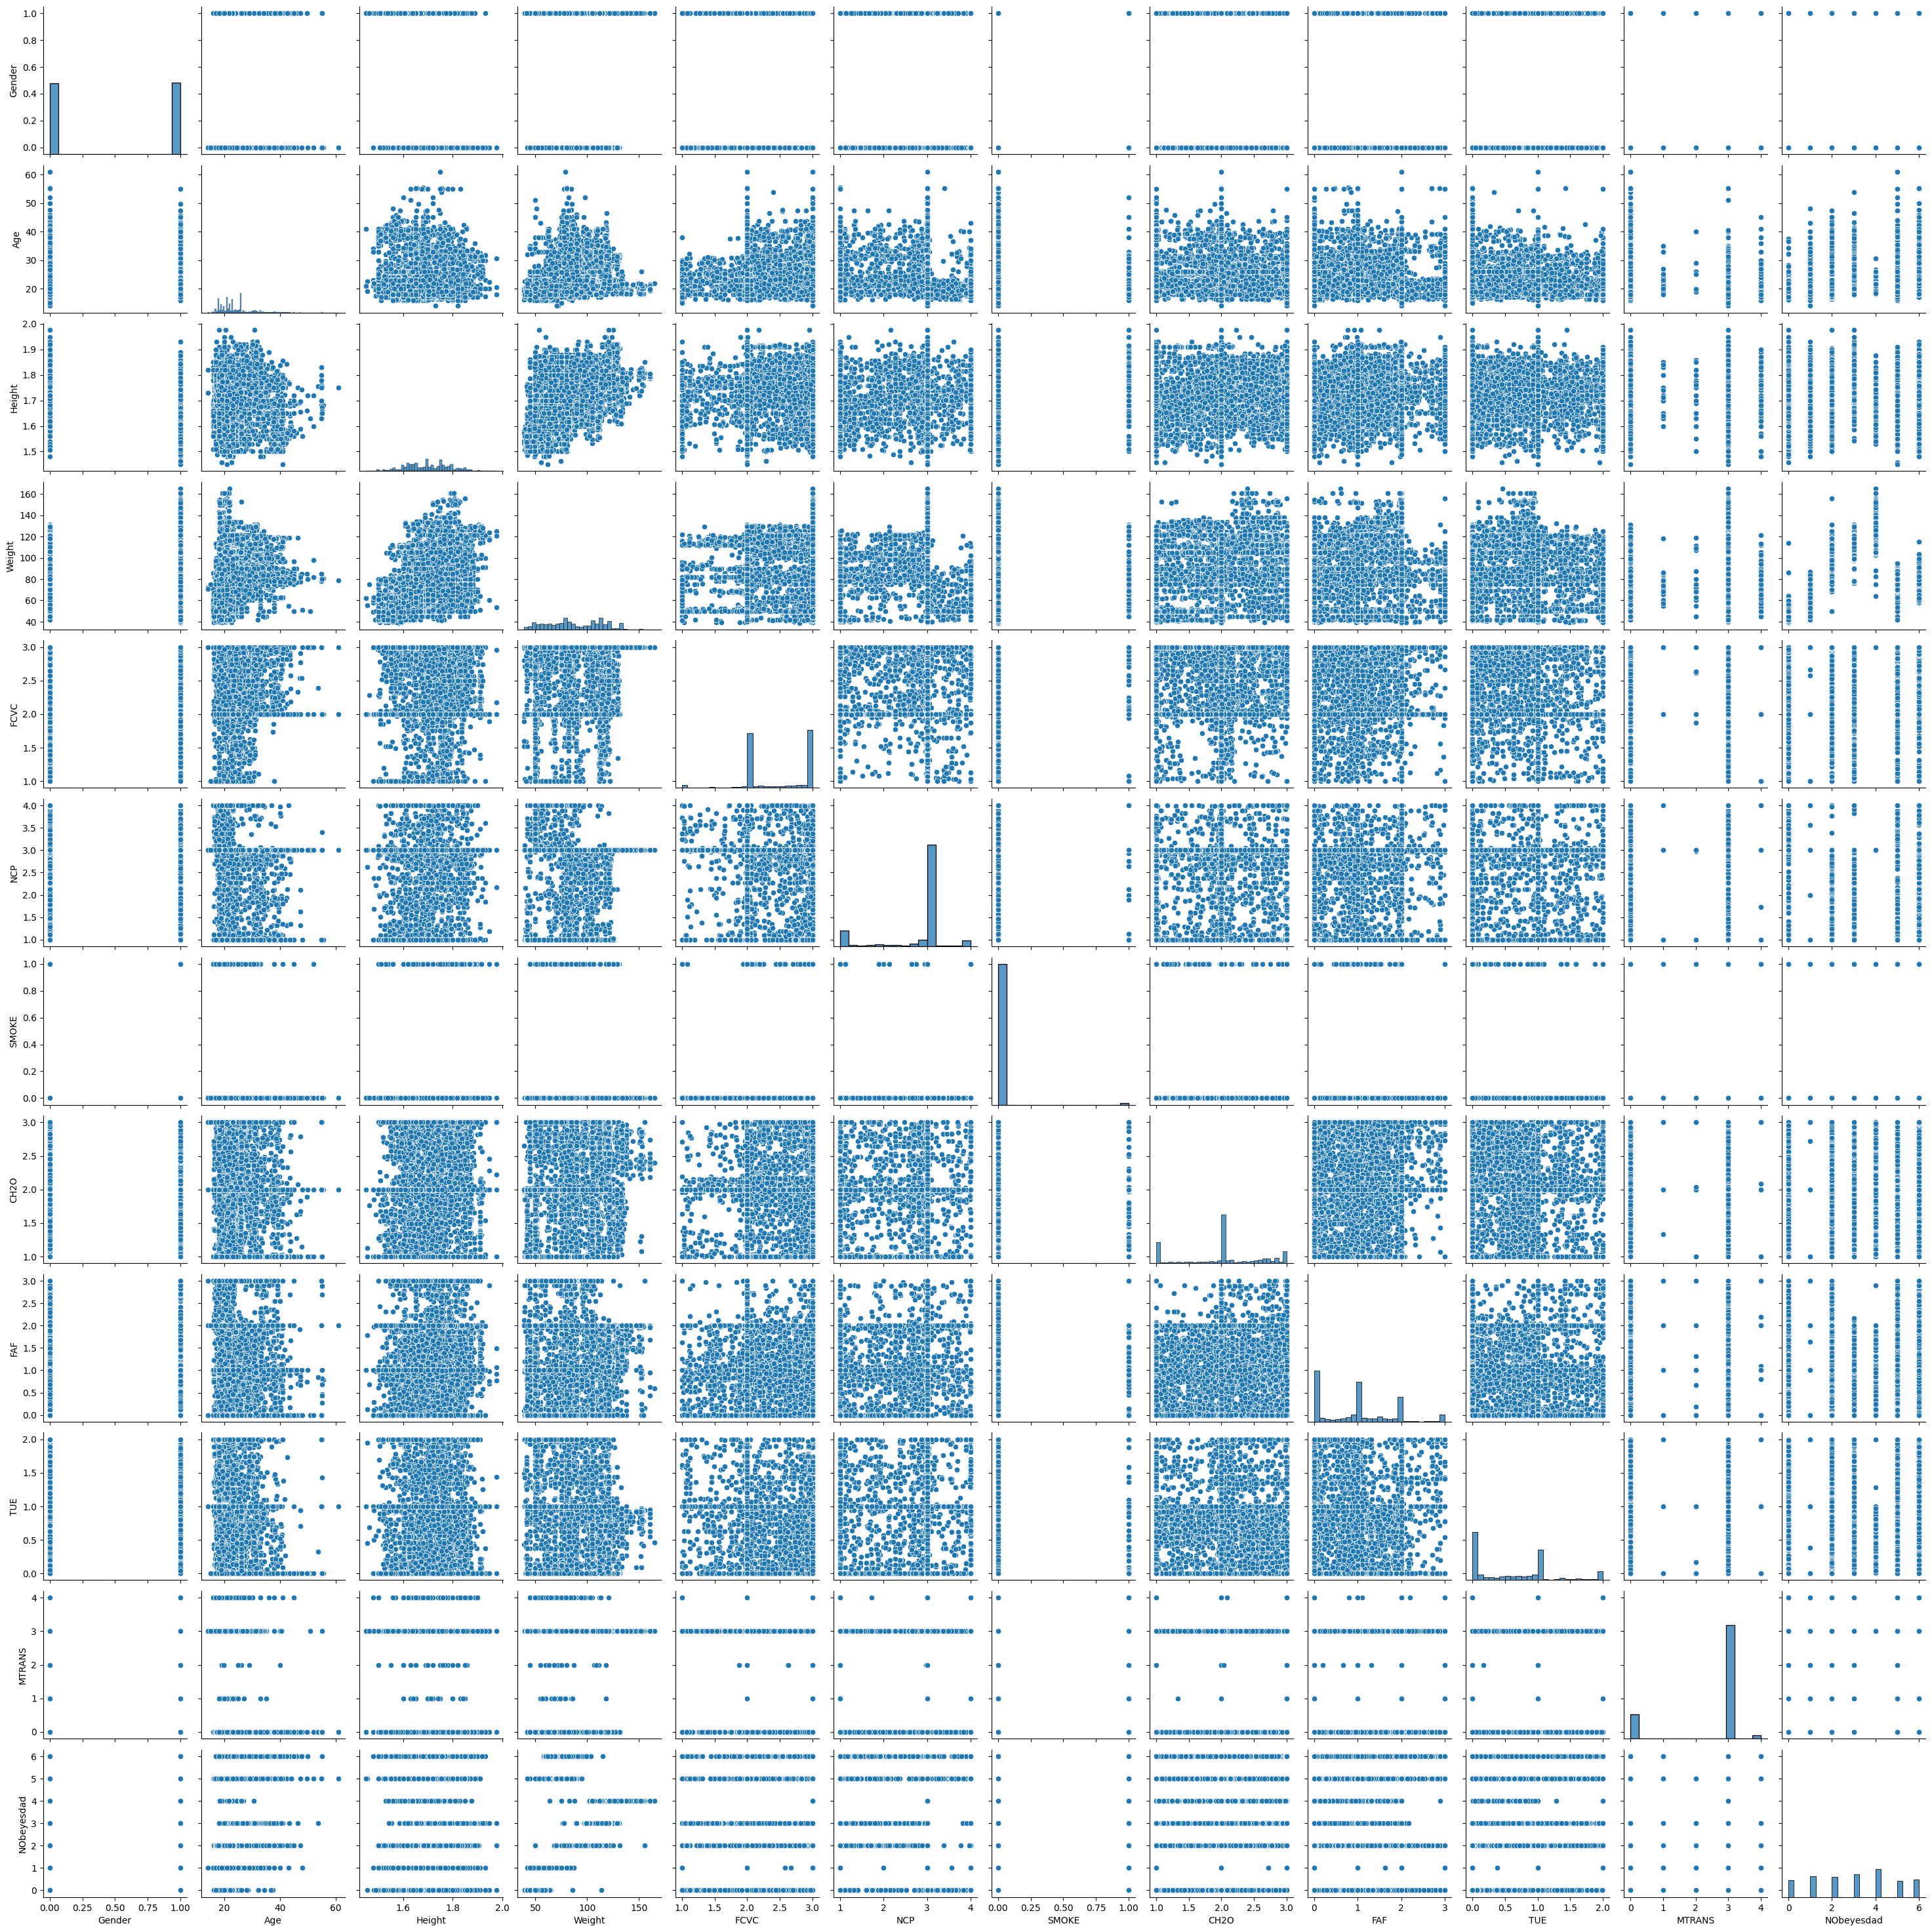

In [15]:
sns.pairplot(df)

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [16]:
df.isnull().sum()

Gender        3305
Age           3308
Height        3262
Weight        3397
FCVC          3315
NCP           3237
SMOKE         3293
CH2O          3338
FAF              0
TUE           3331
MTRANS        3381
NObeyesdad    3313
dtype: int64

In [17]:
df.isnull().sum() / len(df) * 100

Gender        19.886876
Age           19.904928
Height        19.628136
Weight        20.440460
FCVC          19.947049
NCP           19.477706
SMOKE         19.814670
CH2O          20.085444
FAF            0.000000
TUE           20.043324
MTRANS        20.344184
NObeyesdad    19.935014
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

<Axes: >

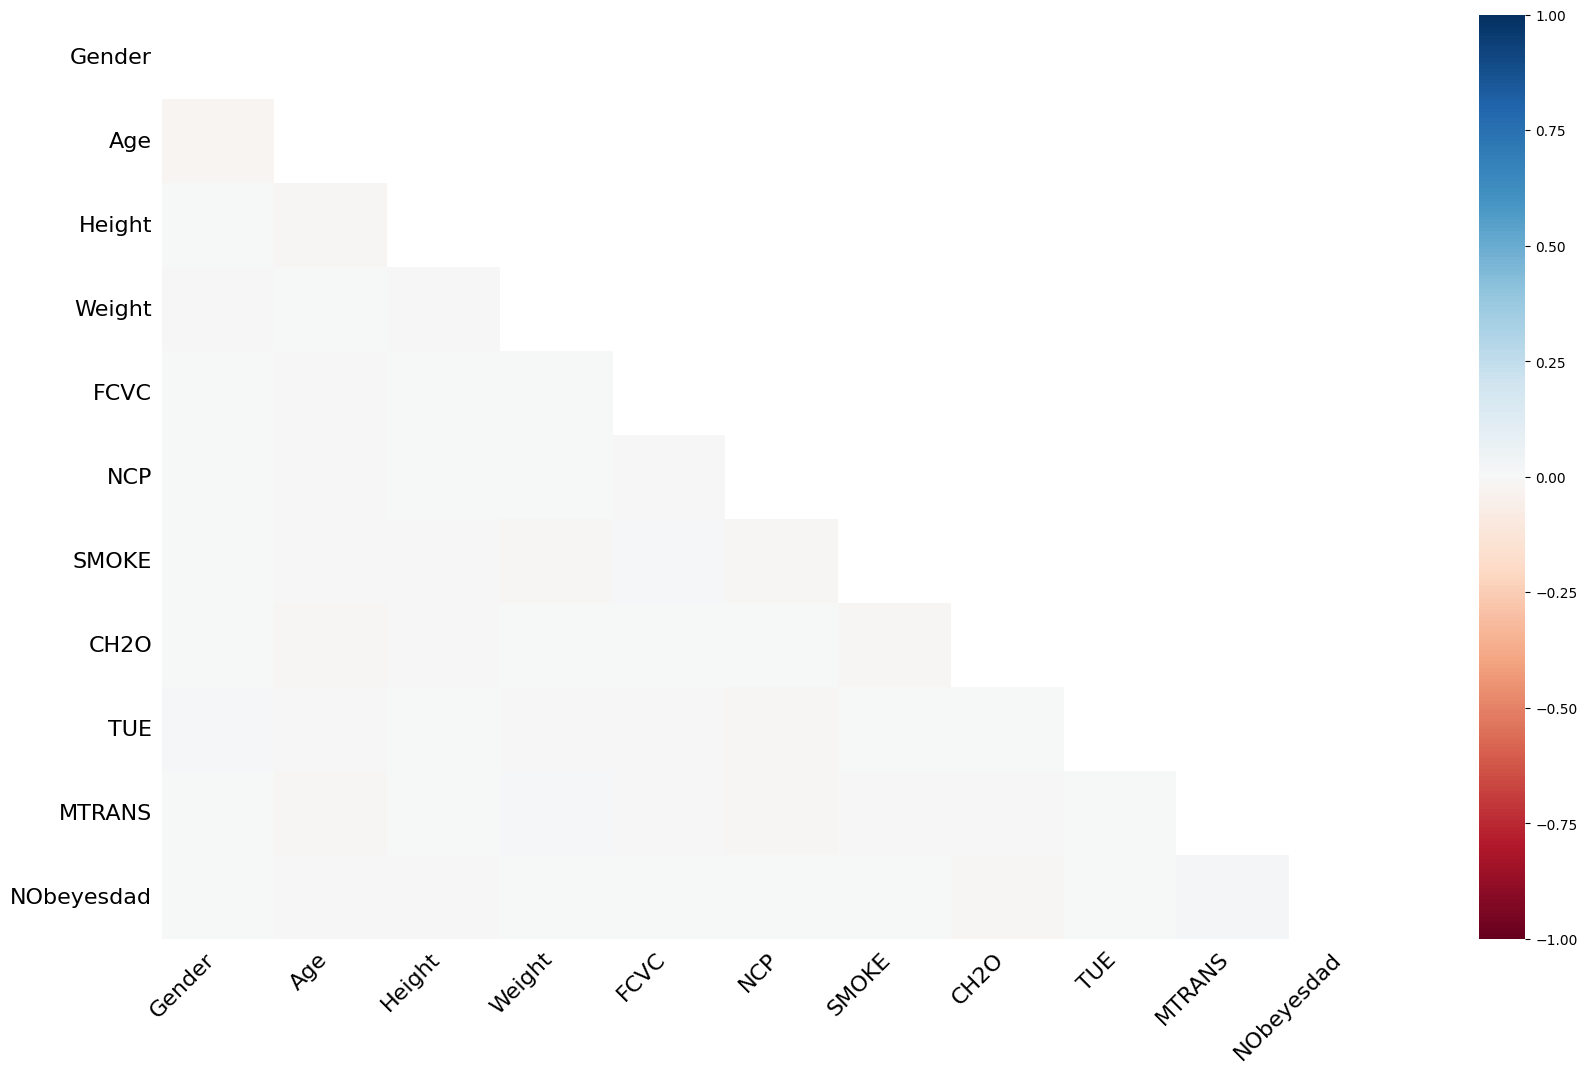

In [18]:
msno.heatmap(df)

<Axes: >

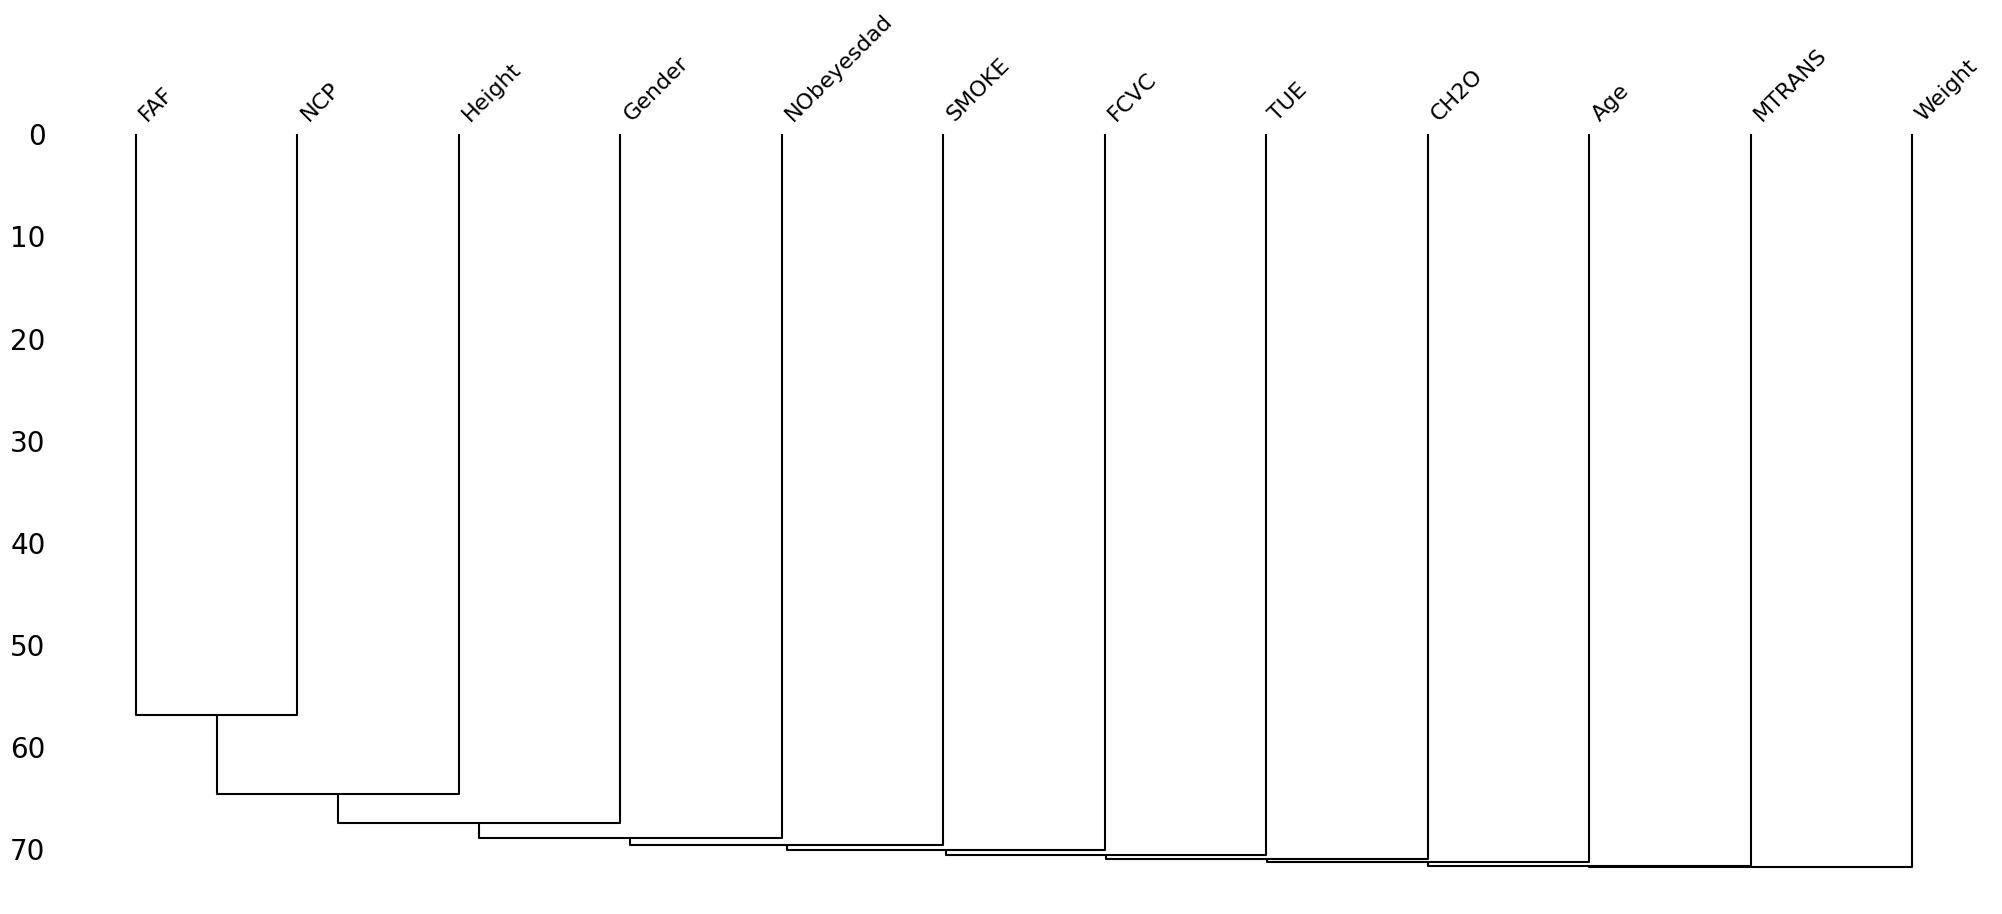

In [19]:
msno.dendrogram(df)

<Axes: >

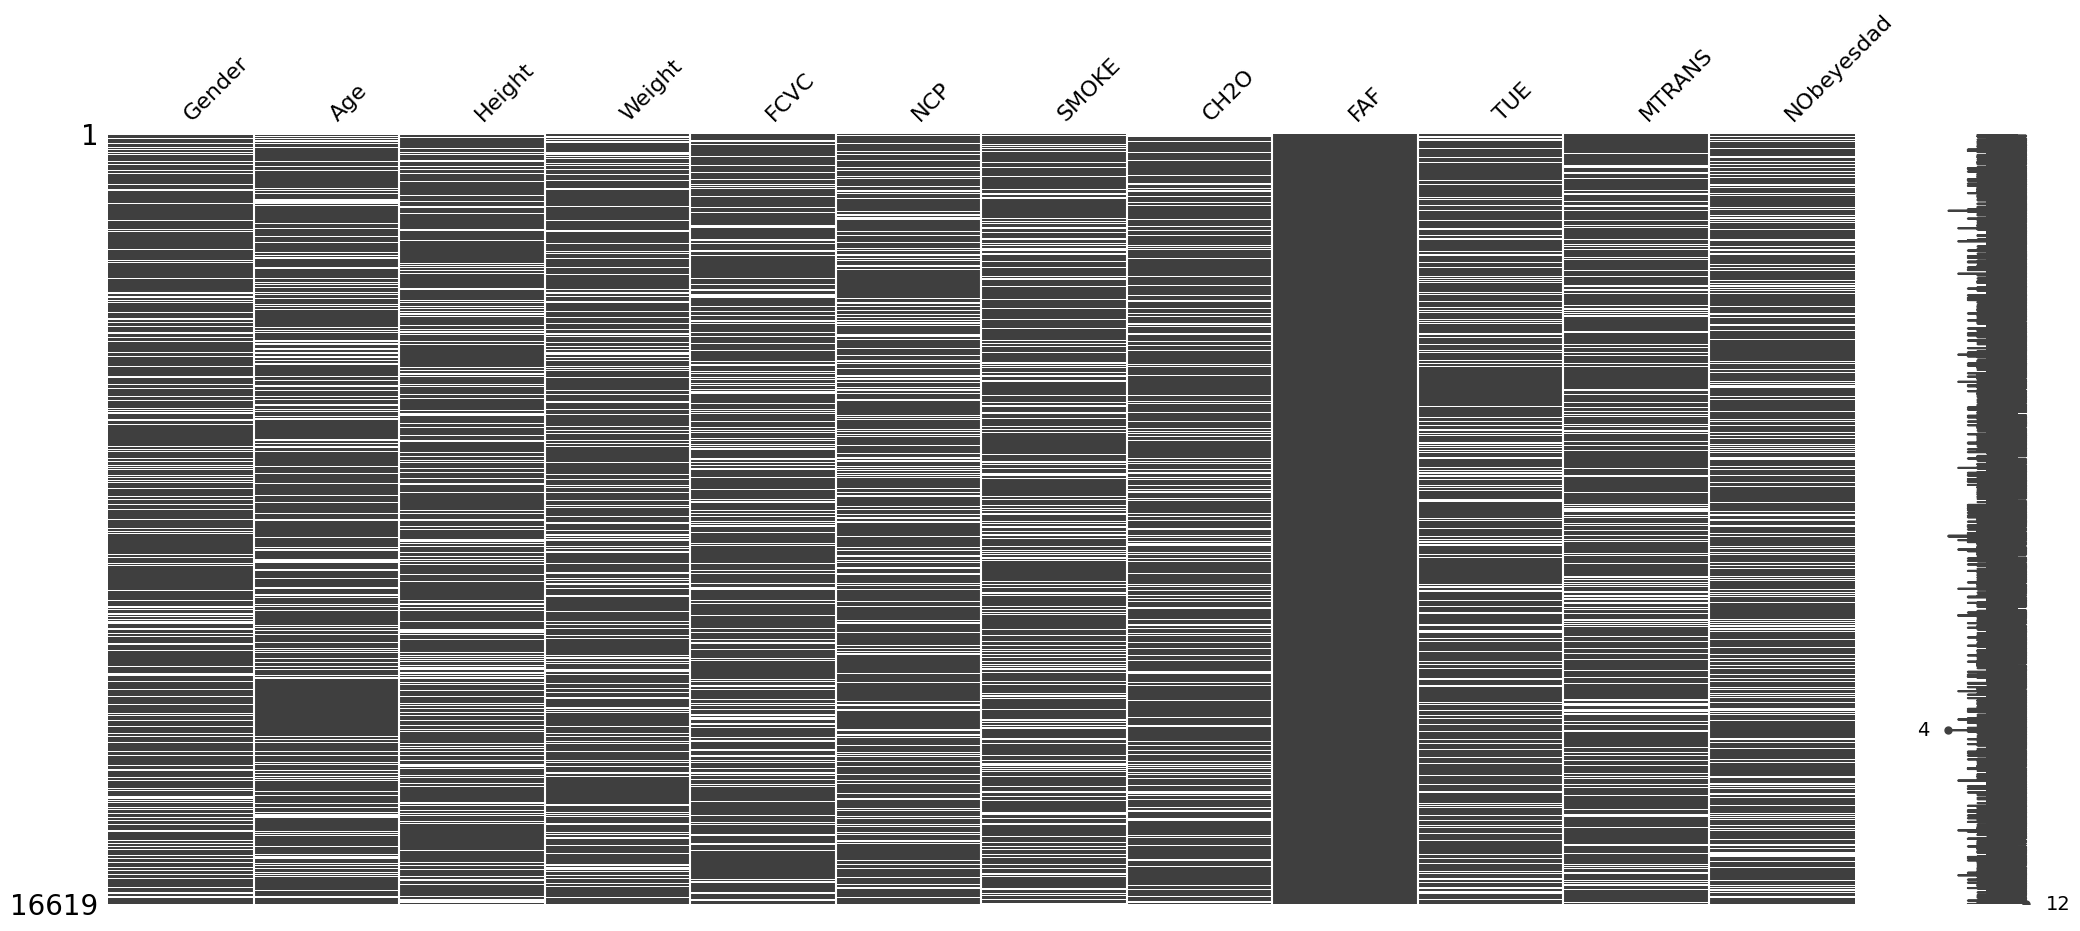

In [20]:
msno.matrix(df)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [21]:
imputer = IterativeImputer()
values = imputer.fit_transform(df[['MTRANS', 'Age']])
df[['MTRANS', 'Age']] = values

In [22]:
imputer = IterativeImputer()
values = imputer.fit_transform(df[['Gender', 'Height']])
df[['Gender', 'Height']] = values

In [23]:
imputer = IterativeImputer()
values = imputer.fit_transform(df[['Weight', 'NObeyesdad']])
df[['Weight', 'NObeyesdad']] = values

In [24]:
imputer = IterativeImputer()
values = imputer.fit_transform(df[['Gender', 'FCVC']])
df[['Gender', 'FCVC']] = values

In [25]:
imputer = IterativeImputer()
values = imputer.fit_transform(df[['Weight', 'CH2O']])
df[['Weight', 'CH2O']] = values

<Axes: xlabel='NCP', ylabel='Count'>

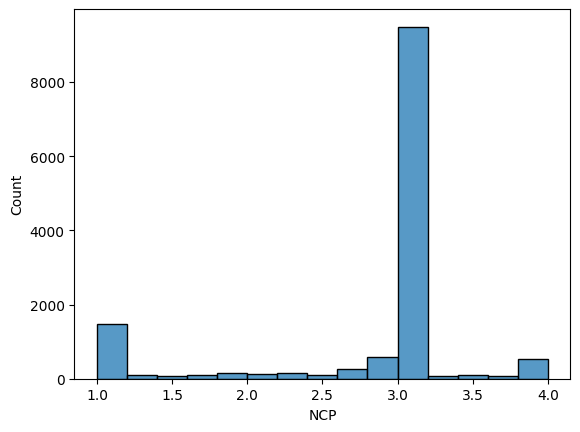

In [26]:
sns.histplot(df['NCP'])

In [27]:
imputer = IterativeImputer()
values = imputer.fit_transform(df[['NCP', 'Age']])
df[['NCP', 'Age']] = values

<Axes: >

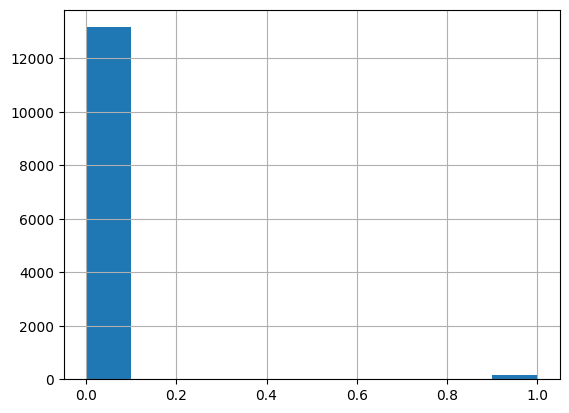

In [28]:
df['SMOKE'].hist()

In [29]:
df['SMOKE'] = df['SMOKE'].fillna(df['SMOKE'].mode()[0])

<Axes: >

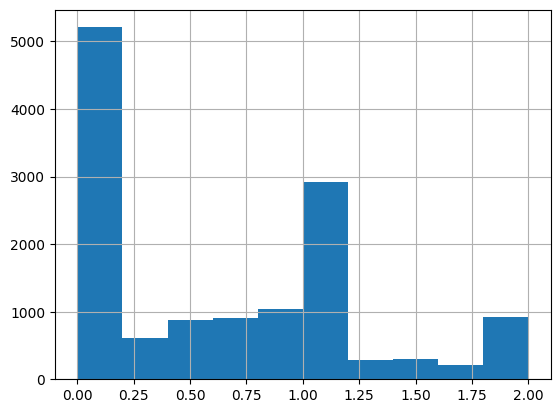

In [30]:
df['TUE'].hist()

In [31]:
df['TUE'] = df['TUE'].fillna(df['TUE'].median())

In [32]:
df.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
FCVC          0
NCP           0
SMOKE         0
CH2O          0
FAF           0
TUE           0
MTRANS        0
NObeyesdad    0
dtype: int64

## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [33]:
X, y = df.drop(columns='FAF'), df['FAF']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Hyper-parameter optimization

Train an XGBoost Model, optimize it's hyper-parameters with grid-search and 5-fold cross validation on the training set.

In [36]:
kf = KFold(n_splits=5)
kf.get_n_splits()

5

In [37]:
model = XGBRegressor()

In [38]:
model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [50]:
param_grid ={
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4, 5],
    'n_jobs': [7]
}

In [51]:
cv = GridSearchCV(estimator=model,param_grid=param_grid,cv=kf)

In [52]:
cv.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    i...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=3, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=7, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [2, 3, 4, 5], 'n_jobs': [7]})

In [53]:
cv.best_score_

0.32811520211934786

In [54]:
model = cv.best_estimator_

In [55]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=7,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
y_pred = model.predict(X_test)

# Cross-validation evaluation

Perform leave-one out cross validation on the entire dataset, with an untrained model with the chosen hyper-parameters from the previous step.

In [57]:
cv.best_score_

0.32811520211934786

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [58]:
mean_squared_error(y_test,y_pred)

0.3971188876986772

In [59]:
r2_score(y_test,y_pred)

0.427559140597897